1\. **Reductions**

Given the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

   1. find the total mean
   2. find the mean for each row and column

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

m = np.arange(12).reshape((3,4))
print(m)
tot_mean = np.mean(m)
print(f"Total mean: {tot_mean}")
mean_row = [np.mean(m[row,:]) for row in range(m.shape[0])] 
print(f"Row mean: Row 1: {mean_row[0]}, Row 2: {mean_row[1]}, Row 3: {mean_row[2]}")
mean_col = [np.mean(m[:, col]) for col in range(m.shape[1])] 
print(f"Column mean: Col 1: {mean_col[0]}, Col 2: {mean_col[1]}, Col 3: {mean_col[2]}, Col 4: {mean_col[3]}")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Total mean: 5.5
Row mean: Row 1: 1.5, Row 2: 5.5, Row 3: 9.5
Column mean: Col 1: 4.0, Col 2: 5.0, Col 3: 6.0, Col 4: 7.0


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [90]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])

using_outer = np.outer(u,v)
print(f"The outer product using numpy outer: \n {using_outer}")
using_list_comp = np.array([i * j for i in u for j in v]).reshape(len(u), len(v))
print(f"The outer product using list comprehension: \n {using_list_comp}")
using_np_broadcasting = u[:, np.newaxis] * v
print(f"The outer product using numpy broadcasting: \n {using_np_broadcasting}")

The outer product using numpy outer: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
The outer product using list comprehension: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
The outer product using numpy broadcasting: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a $10 \times 6$ matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [91]:
print(f"3. Matrix masking")
mat_rand = np.random.uniform(0, 3, (10, 6))
print(mat_rand)
mat_rand[mat_rand < 0.3] = 0
print(mat_rand)

3. Matrix masking
[[0.73161986 0.73866121 2.78928221 1.03447776 0.24064494 0.27239788]
 [1.84722305 1.96597529 1.39246704 1.60115723 0.87248111 1.55026772]
 [1.79843612 0.06792488 1.24438869 2.51440701 2.59982587 1.65026737]
 [0.57217363 0.44934334 2.19087357 1.21930443 0.07133342 2.37255146]
 [1.76998061 1.99035436 0.39690025 1.9396914  1.30355393 2.23651035]
 [1.21297442 2.11057638 1.20891292 1.97411212 1.20030294 2.94313485]
 [2.81532255 0.34495527 2.3283806  1.94828176 1.58168226 2.94776434]
 [1.13154072 2.73226938 1.34757638 2.69169325 0.70567484 1.81410396]
 [2.20466687 2.19837695 2.54478881 0.84921896 1.37758499 2.8391675 ]
 [1.13819393 1.52271218 0.20145222 2.61330155 0.13376542 2.0288107 ]]
[[0.73161986 0.73866121 2.78928221 1.03447776 0.         0.        ]
 [1.84722305 1.96597529 1.39246704 1.60115723 0.87248111 1.55026772]
 [1.79843612 0.         1.24438869 2.51440701 2.59982587 1.65026737]
 [0.57217363 0.44934334 2.19087357 1.21930443 0.         2.37255146]
 [1.76998061 1.

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the `sin` and `cos` functions and indicate graphically (with a line or a marker) where they are close

4. Trigonometric functions
Array using np.linspace: 
 [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.3311875

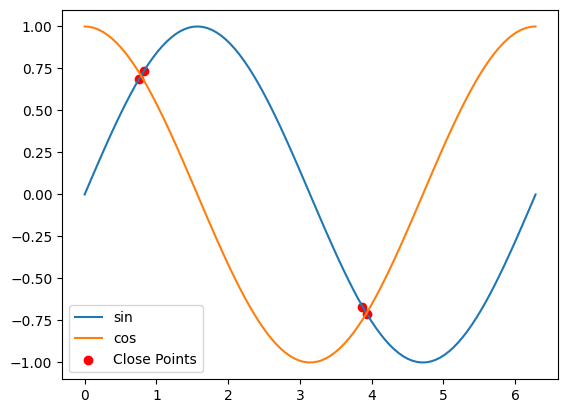

In [92]:
print(f"4. Trigonometric functions")
array_4 = np.linspace(0, 2*np.pi, 100)
print(f"Array using np.linspace: \n {array_4}")
every_10th = array_4[::10]
print(f"Every 10th element: \n {every_10th}")
reversed_array_4 = array_4[::-1]
print(f"Reversed array: \n {reversed_array_4}")
extracted_values = array_4[np.abs(np.sin(array_4) - np.cos(array_4)) < 0.1]
print(f"Extracted values: \n {extracted_values}")

plt.plot(array_4, np.sin(array_4), label='sin')
plt.plot(array_4, np.cos(array_4), label='cos')
plt.scatter(array_4[np.abs(np.sin(array_4) - np.cos(array_4)) < 0.1], np.sin(array_4)[np.abs(np.sin(array_4) - np.cos(array_4)) < 0.1], color='red', label='Close Points')
plt.legend()
plt.show()

5\. **Matrices**

Create a matrix that shows the $10 \times 10$ multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [93]:
multiplication_table = np.arange(1, 11)[:, np.newaxis] * np.arange(1, 11)
print(f"Multiplication table: \n {multiplication_table}")
matrix_trace = np.trace(multiplication_table)
print(f"Trace of the multiplication table matrix: {matrix_trace}")
anti_diagonal = np.fliplr(multiplication_table).diagonal()
print(f"Anti diagonal of the matrix: {anti_diagonal}")
diagonal_w_offset = np.diagonal(multiplication_table, offset=-1)
print(f"Diagonal of the matrix with 1 offset: {diagonal_w_offset}")

Multiplication table: 
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
Trace of the multiplication table matrix: 385
Anti diagonal of the matrix: [10 18 24 28 30 30 28 24 18 10]
Diagonal of the matrix with 1 offset: [ 2  6 12 20 30 42 56 72 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: `0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448`

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [94]:
distance = [0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448]
grid_miles = [abs(j-i) for i in distance for j in distance]
grid_miles = np.array(grid_miles).reshape(10, 10)
print(f"2D grid in miles: \n {grid_miles}")
#grid_km = np.array(grid_miles*1.609344).reshape(10, 10)
grid_km = grid_miles*1.609344
print(f"2D grid in km: \n {grid_km}")

2D grid in miles: 
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]
2D grid in km: 
 [[   0.        318.650112  487.631232 1184.477184 1401.738624 1890.9792
  2373.7824   2484.827136 3078.675072 3939.674112]
 [ 318.650112    0.        168.98112   865.827072 1083.088512 1572.329088
  2055.132288 2166.177024 2760.02496  3621.024   ]
 [ 487.631232  168.98112     0.        696.845952  914.107392 1403.347968
  1886.151168 1997.195904 2591.04384  3452.04288 ]
 [1184.477184  865.827072  696.845952    0.        217.2614

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Construct a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [95]:
N = 99
def find_prime_nums(N):
    sieve = np.ones(N, dtype=bool)
    sieve[:2] = False
    for i in range(2, int(N**0.5)+1):
            if sieve[i]:
                sieve[i*i:N:i] = False
    prime_num = np.nonzero(sieve)[0]
    return prime_num

primes = find_prime_nums(N)
print("Primes:", primes)

execution_time_1 = timeit.timeit('find_prime_nums(N)', globals=globals(), number=1)
print(f"Execution time for ind_prime_num in range 0-99: {execution_time_1} seconds")
N = 999
execution_time_999 = timeit.timeit('find_prime_nums(N)', globals=globals(), number=1)
print(f"Execution time for ind_prime_num in range 0-999: {execution_time_999} seconds")
N = 9999
execution_time_9999 = timeit.timeit('find_prime_nums(N)', globals=globals(), number=1)
print(f"Execution time for ind_prime_num in range 0-9999: {execution_time_9999} seconds")

Primes: [ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
Execution time for ind_prime_num in range 0-99: 9.542040061205626e-06 seconds
Execution time for ind_prime_num in range 0-999: 1.3959011994302273e-05 seconds
Execution time for ind_prime_num in range 0-9999: 2.862501423805952e-05 seconds


The execution time slightly increases as N grows. The increase in execution time is not linear with N; it's much less than an order of magnitude, hence it scales quite well with the size of N.

8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

In [96]:

arr_walk = np.random.randint(0, 2, size=(1000, 200)) * 2 - 1
walking_distances = [np.sum(arr_walk[i]) for i in range(arr_walk.shape[0])]
print(f"Walking distances for each walker: \n {walking_distances} ")

arr_squared = np.array([pow(distance, 2) for distance in walking_distances])
print(f"Square of the previously-obtained array (first 200 elements):  \n {arr_squared[:200]} ")
mean_squared_distance = arr_squared / arr_walk.shape[0]
print(f"Mean of the squared distances at each step:  \n {mean_squared_distance} ")

Walking distances for each walker: 
 [20, 10, -20, -12, 4, -16, -16, -14, 6, 0, 12, 6, 0, 14, -10, 12, 10, 4, -6, 4, -2, -6, -2, 0, 16, 4, -4, 0, -6, -28, -2, 24, 8, -4, 4, 6, 6, 8, 2, -14, -12, 6, -4, 6, 0, 0, 12, -36, -30, 2, 10, -4, -8, 8, 0, -8, -2, -6, -2, -6, -16, -8, 20, 18, 6, 26, -2, 8, 0, 20, 0, 38, -20, -14, 6, 18, 4, -8, 22, -4, -4, 4, -24, 6, 0, -6, 10, 12, -8, -26, -6, 24, -6, 4, 4, 4, -18, 22, -26, 16, 30, -8, -10, 4, -26, 38, 4, 12, 28, -12, 8, 4, 22, 14, 8, 14, 22, -2, -14, -18, -2, 8, -16, 18, 12, 4, 14, 8, 2, -18, -4, -20, -12, 10, 20, 16, 16, -16, -6, 4, -16, 28, -30, 2, 30, -6, 16, 20, 4, -14, -2, 8, 4, -12, 2, -12, -4, -12, 16, 16, -22, -8, 10, 8, -4, 16, 14, 0, -12, -4, -14, 8, -18, 14, -32, 4, 8, -22, 14, 8, 16, -20, 2, 14, -10, 4, -26, -20, 8, 8, -14, -10, 10, -2, 0, 6, -4, -2, 8, 8, -8, -4, -20, 18, 16, 0, 6, -18, -6, 16, 2, -12, -2, 4, -38, 0, -2, 14, -14, -2, 18, -10, 26, -14, -12, -12, 12, -16, -12, -16, 8, -14, 0, 4, 0, -8, -4, 2, 8, 2, 16, 4, -6, 10, -18,